**URL Dashboard : (https://public.tableau.com/views/Milestone1Dashboard/DashboardMilestone1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)**

# **I. Perkenalan**

```
=======================================================================================================================================
Milestone 1 (Phase 0)

Nama  : Achmed Alridho Zulkarnaen
Batch : RMT-037

File ipynb ini berisikan pengolahan data Amazon delivery, tujuan dari pengolahan data ini adalah untuk mengetahui penilaian customer terhadap delivery services, dan untuk melihat apakah ada peningkatan yang bisa di lakukan untuk membuat customer semakin satisfied.
=======================================================================================================================================
```

# **II. Identifikasi Masalah**

### LATAR BELAKANG
```
Saya merupakan lulusan Hactive8 yang menjadi pegawai baru di tim data analytics Amazon. Perusahaan ingin mengetahui kecenderungan dan sikap pelanggan pada Area Urban di negara X pada tahun 2022. Tetapi karena para senior di tim data sedang sibuk mengerjakan project lain, project ini harus saya handle sendiri. Nantinya hasil project ini akan di presentasikan ke tim manajemen operasional dan logistik. Informasi yang saya dapatkan nanti akan menjadi acuan untuk tindakan perusahaan selanjutnya dan hasil analisis ini juga bisa digunakan untuk meningkatkan kualitas pengiriman pada Area Urban jika diperlukan.
```

### **Problem Statement (SMART)**
Saya ingin mengetahui kecenderungan dan sikap pelanggan pada Area Urban di negara X pada tahun 2022. Hal ini bertujuan untuk meningkatkan kualitas pengiriman pada Area Urban dalam waktu dekat jika diperlukan.

* Specific : Mengetahui kecenderungan dan sikap pelanggan pada Area Urban di negara X pada tahun 2022.

* Measurable : Diukur dari rating yang telah di berikan oleh customer dan juga melihat total waktu pengiriman.

* Achievable : Dapat dicapai dengan menggunakan normalisasi data dan ilmu statistik dari data yang tersedia untuk menghasilkan laporan analisis serta dashboard untuk di presentasikan.

* Relevant : Relevan untuk melihat perlu atau tidaknya menaikan kualitas pengiriman di Area Urban. Selain itu juga relevant untuk menaikan customer satisfaction agar perusahaan bisa berkembang lebih besar lagi.

* Time-Bound : Analisis akan dilakukan dalam waktu 2 minggu dan kemudian akan di presentasikan ke tim manajemen operasional dan logistik

### **Penjabaran Masalah:**
- Apa kategori barang yang paling sering dibeli oleh pelanggan di area Urban?
- Kapan waktu paling banyak terjadinya pengiriman barang di seluruh area Negara X?
- Berapa rata-rata umur agent yang melakukan delivery di area Urban dan apakah ada hubungan dengan rating?
- Bagaimana respon customer terhadap pelayanan delivery di area Urban?
- Berapa lama waktu rata-rata yang dibutuhkan pelanggan area Urban dari mulai order hingga mendapatkan barang dan berapa waktu idealnya?
- Apakah kita perlu meningkatkan kecepatan delivery agar lebih baik lagi di area Urban berdasarkan waktu ideal dan rating?

# **III. Import Library**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import spearmanr

# **IV. Data Loading**

Data Source : https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset

In [2]:
# Melakukan read csv
df = pd.read_csv('amazon_delivery.csv')
# Saya display seluruh column tanpa terpotong dengan cara ini
pd.set_option("display.max.columns",None)
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


# **V. Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


* Melakukan display untuk melihat data. Terdapat indikasi missing value pada data yang terlihat dari column `Weather`. Data type juga masih ada yang belum sesuai seperti Order_Date contohnya yang masih berbentuk object dan harus di ubah bentuknya. Sebelum melakukan perubahan data type saya akan melakukan `non-standard missing value`.

In [4]:
# Memasukan kemungkinan missing value ke dalam variabel
miss_val = ["NaN ", "Nan", "nan", "n/a", "na", "none", "?", 0]
df = pd.read_csv('amazon_delivery.csv', na_values = miss_val)
# Melakukan read data yang kosong dan melihat jumlahnya
df.isnull().sum()

Order_ID              0
Agent_Age             0
Agent_Rating         54
Store_Latitude     3505
Store_Longitude    3505
Drop_Latitude         0
Drop_Longitude        0
Order_Date            0
Order_Time           91
Pickup_Time           0
Weather              91
Traffic              91
Vehicle               0
Area                  0
Delivery_Time         0
Category              0
dtype: int64

* Terdapat beberapa column yang memiliki missing value, saya akan melihat berapa persen missing value ini terhadap seluruh data per columnya masing-masing, khususnya untuk column store latitude dan longitude

In [5]:
# Melakukan pengecekan persentase missing value untuk seluruh column
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"=",df[i].isnull().sum()*100/df.shape[0],"%")

Agent_Rating = 0.12345961270262237 %
Store_Latitude = 8.013443380049841 %
Store_Longitude = 8.013443380049841 %
Order_Time = 0.20805231029515991 %
Weather = 0.20805231029515991 %
Traffic = 0.20805231029515991 %


 * Dapat di lihat missing value terbesar adalah `8.013%` pada column Store_Latitude dan Store_Longitude. Missing value ini `< 10%` dari total data di column masing-masing, maka dari itu saya akan lakukan penghapusan data saja dan menghilangkan whitespace (untuk sekedar mengantisipasi saja adanya whitespace)

* Saya juga akan sekalian merubah data type column Order_Date, Order_Time, and Pickup_Time menjadi datetime

In [6]:
# Menghilangkan whitespace untuk judul column
df.columns = df.columns.str.strip()

In [7]:
# Hapus rows yang memiliki data kosong
df.dropna(inplace=True)
# Mengganti column Order_Date, Order_Time, and Pickup_Time menjadi datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])  
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])
df

C:\Users\Alridho\AppData\Local\Temp\ipykernel_2356\4129243311.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'])
C:\Users\Alridho\AppData\Local\Temp\ipykernel_2356\4129243311.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-10-24 19:45:00,2024-10-24 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-10-24 18:00:00,2024-10-24 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-10-24 13:30:00,2024-10-24 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43733,gcxb277393192,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,2024-10-24 21:45:00,2024-10-24 21:55:00,Windy,Jam,motorcycle,Metropolitian,165,Sports
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2024-10-24 11:35:00,2024-10-24 11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2024-10-24 23:50:00,2024-10-24 00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2024-10-24 13:35:00,2024-10-24 13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


* `Ada sedikit masalah pada bagian Order_Time dan Pickup_Time, tanggal 2024-10-23 jadi terprint di bagian ini dan seragam sampai seluruh data. Hal ini tidak akan mengganggu analisis, karena yang diperlukan dari kedua column ini hanyalah waktu berupa jam dan menit saja. Maka dari itu akan saya abaikan dan lanjut ke tahap berikutnya, di kedua column ini juga sudah berubah data typenya menjadi datetime jadi sudah benar.`

* Data sudah dibersihkan dari nilai Null dan juga whitespace. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40109 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         40109 non-null  object        
 1   Agent_Age        40109 non-null  int64         
 2   Agent_Rating     40109 non-null  float64       
 3   Store_Latitude   40109 non-null  float64       
 4   Store_Longitude  40109 non-null  float64       
 5   Drop_Latitude    40109 non-null  float64       
 6   Drop_Longitude   40109 non-null  float64       
 7   Order_Date       40109 non-null  datetime64[ns]
 8   Order_Time       40109 non-null  datetime64[ns]
 9   Pickup_Time      40109 non-null  datetime64[ns]
 10  Weather          40109 non-null  object        
 11  Traffic          40109 non-null  object        
 12  Vehicle          40109 non-null  object        
 13  Area             40109 non-null  object        
 14  Delivery_Time    40109 non-null  int64     

* Dapat terlihat column Order_Date, Order_Time, and Pickup_Time juga sudah berubah data typenya menjadi datetime

**Penambahan Column-Column Baru Untuk Membantu Analisis**

* Saya menggunakan rumus haversine untuk menghitung jarak antara lokasi penjual dengan lokasi pembeli.

In [9]:
# Membuat fungsi untuk menghitung jarak antara lokasi store dan area drop barang
def hvrsne(Olat, Olon, Dlat, Dlon):
    # Merubah beda latitude dan longitude menjadi radians
    d_latitude = np.radians(Dlat - Olat)
    d_longitude = np.radians(Dlon - Olon)
    '''
    Menghitung menggunakan formula Haversine :
    Formula Haversine menghitung jarak antara dua 
    titik di bumi dengan memperhitungkan panjang 
    garis lurus tanpa mengabaikan kelengkungan bumi.
    (Kita harus mencari nilai a lalu c dan d)
    '''
    a = np.sin(d_latitude / 2) ** 2 + np.cos(np.radians(Olat)) * np.cos(np.radians(Dlat)) * np.sin(d_longitude / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    # jarak antara dua titik dalam kilometer
    d = 6370 * c
    return d

# Menambahkan column baru bernama Jarak(km)
df['Jarak(km)'] = round(hvrsne(df['Store_Latitude'],df['Store_Longitude'],df['Drop_Latitude'],df['Drop_Longitude']),2)

# Menambahkan column baru bernama Tingkat_Rating
tingkat_rating = []
for i in df['Agent_Rating']:
    if i >= 4.5:
        tingkat_rating.append('Very Good')
    elif i >= 4.0:
        tingkat_rating.append('Good')
    elif i >= 3.5:
        tingkat_rating.append('Bad')
    elif i >= 3.0:
        tingkat_rating.append('Poor')
    else:
        tingkat_rating.append('Very Poor')
df['Tingkat_Rating'] = tingkat_rating

# Menambahkan column baru bernama Order_Time_Hour
df['Order_Time_Hour'] = df['Order_Time'].dt.hour
df['Order_Time_Hour'] = df['Order_Time_Hour'].replace(0,24) # Replace 0 menjadi 12 siang atau 24 malam

# Menambahkan column baru bernama Order_Pickup_Time(min)
df['Order_Pickup_Time(min)'] = (df['Pickup_Time'] - df['Order_Time']).dt.total_seconds() / 60

Setelah dijalankan column baru bernama Order_Time_Hour, Tingkat_Rating, Jarak(km), dan Order_Pickup_Time(min) akan tertambahkan dalam dataframe.

* Order_Time_Hour : Mengambil jam dari column Order_Time dan di Replace angka 0 menjadi 12 siang atau 24 malam. Digunakan nantinya untuk mengetahui jam berapa paling banyak order masuk.

* Tingkat_Rating : Merubah rating yang tadinya angka menjadi suatu parameter range tetap berbentuk (string) antara very poor - very good. `5.0 - 4.5 (Very Good), 4.4 - 4.0 (Good), 3.9 - 3.5 (Bad), 3.4 - 3.0 (Poor), < 3.0 (Very Poor)`

* Jarak(km) : Column yang berisikan `jarak dalam km` antara lokasi pickup dan lokasi drop barang.

* Order_Pickup_Time(min) : Merupakan waktu yang dibutuhkan oleh kurir/delivery agent untuk melakukan pickup di tempat penjual.

In [10]:
# Merubah nama column Delivery_Time
df.rename(columns={'Delivery_Time' : 'Start_to_End_Time(min)'},inplace=True)

* Saya merasa bahwa column Delivery_Time masih belum tepat, karena column ini merupakan waktu yang diperlukan mulai dari order barang hingga diterima oleh pembeli. Maka dari itu saya ubah namanya menjadi `Start_to_End_Time(min)`. Kemudian saya membuat column baru lagi bernama Delivery_Time(min) yang berisikan `Start_to_End_Time(min) - Order_Pickup_Time(min)` Barulah didapatkan Delivery_Time(min) yang tepat.

* Delivery_Time(min) : Waktu yang dibutuhkan dari delivery agent mengambil barang di toko hingga di drop ke pembeli. `Waktu yang dibutuhkan delivery agent untuk mengambil barang sudah di hilangkan dari column ini jadi hanya pure waktu antar saja`.

In [11]:
# Menambahkan column Delivery_Time
df['Delivery_Time(min)'] = df['Start_to_End_Time(min)'] - df['Order_Pickup_Time(min)']

* Column Delivery_Time(min) sudah ditambahkan kedalam df

In [12]:
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min)
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.02,Very Good,11,15.0,105.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-10-24 19:45:00,2024-10-24 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.18,Very Good,19,5.0,160.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55,Good,8,15.0,115.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-10-24 18:00:00,2024-10-24 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.79,Very Good,18,10.0,95.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-10-24 13:30:00,2024-10-24 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.21,Very Good,13,15.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43733,gcxb277393192,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,2024-10-24 21:45:00,2024-10-24 21:55:00,Windy,Jam,motorcycle,Metropolitian,165,Sports,16.60,Good,21,10.0,155.0
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2024-10-24 11:35:00,2024-10-24 11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.49,Very Good,11,10.0,150.0
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2024-10-24 23:50:00,2024-10-24 00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.66,Very Good,23,-1425.0,1505.0
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2024-10-24 13:35:00,2024-10-24 13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.23,Very Good,13,5.0,125.0


* Melakukan cek column untuk memastikan seluruh column baru dan perubahan yang dilakukan sudah okay

Selanjutnya saya notice bahwa ada beberapa data yang salah pada column Order_Pickup_Time(min) ditandai dengan (-). Hal ini disebabkan oleh delivery time pada jam mendekati 12 malam, dan pickup di keesokan harinya, tetapi hari masih di hitung hari yang sama, maka dari itu terjadi angka yang minus(-). Untuk handle hal ini maka saya akan menghitung dulu jumlah kesalahannya ada berapa baris di dalam df.

In [13]:
# Menghitung adanya kesalahan pada data di column Order_Pickup_Time(min)
jumlah_minus = (df['Order_Pickup_Time(min)'] < 0).sum()
print(f"Jumlah baris dengan nilai minus: {jumlah_minus}")

Jumlah baris dengan nilai minus: 758


* Terdapat `758 baris` yang salah pada data. Nilai waktu pengambilan order tidak boleh minus, hal ini menyebabkan missleading analisis nantinya. Maka dari itu saya selanjutnya akan menghilangkan/drop saja baris dengan nilai minus agar data jadi bersih.

In [14]:
# Drop baris yang memiliki nilai minus pada column Order_Pickup_Time(min)
df = df[df['Order_Pickup_Time(min)'] > 0]
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min)
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.02,Very Good,11,15.0,105.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-10-24 19:45:00,2024-10-24 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.18,Very Good,19,5.0,160.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55,Good,8,15.0,115.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-10-24 18:00:00,2024-10-24 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.79,Very Good,18,10.0,95.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-10-24 13:30:00,2024-10-24 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.21,Very Good,13,15.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43732,uftb261665932,28,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,2024-10-24 21:55:00,2024-10-24 22:00:00,Sandstorms,Jam,scooter,Metropolitian,145,Toys,4.66,Very Good,21,5.0,140.0
43733,gcxb277393192,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,2024-10-24 21:45:00,2024-10-24 21:55:00,Windy,Jam,motorcycle,Metropolitian,165,Sports,16.60,Good,21,10.0,155.0
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2024-10-24 11:35:00,2024-10-24 11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.49,Very Good,11,10.0,150.0
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2024-10-24 13:35:00,2024-10-24 13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.23,Very Good,13,5.0,125.0


* Terlihat data sudah sangat bersih dan representatif untuk saat ini.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39351 entries, 0 to 43738
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                39351 non-null  object        
 1   Agent_Age               39351 non-null  int64         
 2   Agent_Rating            39351 non-null  float64       
 3   Store_Latitude          39351 non-null  float64       
 4   Store_Longitude         39351 non-null  float64       
 5   Drop_Latitude           39351 non-null  float64       
 6   Drop_Longitude          39351 non-null  float64       
 7   Order_Date              39351 non-null  datetime64[ns]
 8   Order_Time              39351 non-null  datetime64[ns]
 9   Pickup_Time             39351 non-null  datetime64[ns]
 10  Weather                 39351 non-null  object        
 11  Traffic                 39351 non-null  object        
 12  Vehicle                 39351 non-null  object     

* Seluruh data type juga sudah cocok dengan column masing-masing

`Melakukan looping untuk menghilangkan seluruh whitespace dari seluruh rows yang bertipe object`

In [16]:
for col in df.columns:
    if df[col].dtype == "object":
        df.loc[:, col] = df[col].str.strip()

* Data selanjutnya sudah bisa di analisis.

# **VI. Analisis & Perhitungan**

### **Statistik Deskriptif**

**------------------- Penjabaran Seluruh Data -----------------------------**

In [17]:
# Menampilkan 5 data teratas sebagai referensi
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min)
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.02,Very Good,11,15.0,105.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-10-24 19:45:00,2024-10-24 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.18,Very Good,19,5.0,160.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55,Good,8,15.0,115.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-10-24 18:00:00,2024-10-24 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.79,Very Good,18,10.0,95.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-10-24 13:30:00,2024-10-24 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.21,Very Good,13,15.0,135.0


**Perhitungan Central Tendency**

* Menghitung mean dan median dari column numerik dalam df

**MEAN & MEDIAN**

In [18]:
# Menghitung mean dan median dari seluruh column numerik di df
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
# membuat tabel untuk seluruh mean dan median
mean_table = pd.DataFrame(mean_values, columns=['Mean'])
median_table = pd.DataFrame(median_values, columns=['Median'])

In [19]:
mean_table.round(2)

,Mean
Agent_Age,29.56
Agent_Rating,4.63
Store_Latitude,18.75
Store_Longitude,76.92
Drop_Latitude,18.98
Drop_Longitude,76.98
Start_to_End_Time(min),125.43
Jarak(km),28.24
Order_Time_Hour,17.56
Order_Pickup_Time(min),9.95


- Rata-rata umur kurir (Agent_Age) adalah `29 tahun`
- Rata-rata rating yang diberikan pembeli ke kurir (Agent_Rating) adalah `4.63`
- Rata-rata waktu yang dibutuhkan dari oleh kurir untuk mengantarkan barang (Delivery_Time(min)) adalah `115.48` menit
- Rata-rata waktu yang dibutuhkan kurir untuk mengambil barang ke toko penjual (Order_Pickup_Time(min)) adalah `9.95` menit
- Rata-rata total waktu yang dibutuhkan pembeli dari pertama kali order hingga order selesai (Start_to_End_Time(min)) adalah `125.43` menit
- Rata-rata jarak yang ditempuh oleh kurir dari toko penjual sampai ke tempat drop (Jarak(km)) adalah `28.24` km

In [20]:
median_table

,Median
Agent_Age,30.000000
Agent_Rating,4.700000
Store_Latitude,19.055831
Store_Longitude,76.618203
Drop_Latitude,19.124049
Drop_Longitude,76.662620
Start_to_End_Time(min),125.000000
Jarak(km),9.190000
Order_Time_Hour,19.000000
Order_Pickup_Time(min),10.000000


Berikut juga merupakan median dari masing-masing column yang memiliki nilai value yang numerik dan dapat di ukur. Dari hasil mean dan median ini terlihat bahwa:

* Mean dan Median angkanya mendakati satu sama lain, maka dari itu hal ini mengindikasikan bahwa sebaran data tersebut relatif simetris dan tidak memiliki penyimpangan yang besar (outlier).

**MODE**

*Selanjutnya saya akan melihat nilai modus dari column-column yang saya butuhkan*

In [21]:
# Perhitungan modus
modus = {
    'Agent_Age': df['Agent_Age'].mode().iloc[0],
    'Agent_Rating': df['Agent_Rating'].mode().iloc[0],
    'Delivery_Time(min)': df['Delivery_Time(min)'].mode().iloc[0],
    'Order_Pickup_Time(min)': df['Order_Pickup_Time(min)'].mode().iloc[0],
    'Order_Time_Hour': df['Order_Time_Hour'].mode().iloc[0],
    'Start_to_End_Time(min)' : df['Start_to_End_Time(min)'].mode().iloc[0],
    'Jarak(km)': df['Jarak(km)'].mode().iloc[0],
    'Category': df['Category'].mode().iloc[0],
    'Vehicle': df['Vehicle'].mode().iloc[0],
    'Weather': df['Weather'].mode().iloc[0],
    'Traffic': df['Traffic'].mode().iloc[0]
}
# Menjadikan perhitungan modus ke bentuk dataframe
mode_df = pd.DataFrame(list(modus.items()), columns=['Column', 'Mode'])
mode_df

,Column,Mode
0,Agent_Age,35
1,Agent_Rating,4.8
2,Delivery_Time(min),120.0
3,Order_Pickup_Time(min),5.0
4,Order_Time_Hour,21
5,Start_to_End_Time(min),130
6,Jarak(km),1.55
7,Category,Electronics
8,Vehicle,motorcycle
9,Weather,Fog


- Delivery Agent Amazon paling banyak berumur `35 tahun` (Agent_Age)	
- Rating yang paling sering diberikan oleh pembeli kepada delivery agent adalah `4.8` (Agent_Rating)
- Waktu paling banyak yang dibutuhkan untuk kurir mengantarkan barang adalah `120` menit (Delivery_Time(min))
- Waktu paling banyak yang dibutuhkan untuk kurir mengambil barang ke toko penjual adalah `5` menit (Order_Pickup_Time(min))
- Waktu paling banyak yang dibutuhkan untuk pembeli dari pertama kali order hingga order selesai adalah `130` menit (Start_to_End_Time(min))
- Pemesanan barang terbanyak ada di jam `21`/`9 malam` (Order_Time_Hour)
- Jarak delivery yang paling sering di tempuh oleh kurir adalah `1.55` km (Jarak(km))
- Kategori barang yang paling sering dipesan oleh pembeli adalah kategori `elektronik` (Category)
- Tipe kendaraan yang paling sering digunakan oleh kurir adalah `motorcycle` (Vehicle)
- Keadaan udara pada negara X yang paling sering dihadapi oleh kurir adalah `berkabut` (Weather)
- Tingkat kemacetan lalu lintas negara X yang paling sering dihadapi oleh kurir adalah `rendah` (Traffic)

Selanjutnya saya ingin mengetahui kategori barang apa saja yang dimiliki oleh data frame dan berapa jumlah terjualnya dari masing-masing kategori barang

In [22]:
# Melakukan display value count dari column Category
df['Category'].value_counts()

Category
Electronics     2560
Toys            2531
Jewelry         2531
Books           2525
Skincare        2503
Outdoors        2497
Snacks          2458
Apparel         2451
Home            2444
Sports          2436
Pet Supplies    2432
Grocery         2414
Shoes           2400
Kitchen         2396
Cosmetics       2388
Clothing        2385
Name: count, dtype: int64

* Dapat terlihat terdapat 16 kategori barang yang di jual dan di kirim oleh Amazon. Category yang paling banyak terjual berupa `Electronics` dan yang paling sedikit terjual adalah `Clothing`. Tetapi jika saya perhatikan jumlah barang terjual dari masing-masing kategori barang tidak berbeda jauh yaitu di range `2385 - 2560`

**Mengetahui Range Order_Date**

In [23]:
# Display 5 data teratas untuk referensi analisis di bawah
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min)
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.02,Very Good,11,15.0,105.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-10-24 19:45:00,2024-10-24 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.18,Very Good,19,5.0,160.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55,Good,8,15.0,115.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-10-24 18:00:00,2024-10-24 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.79,Very Good,18,10.0,95.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-10-24 13:30:00,2024-10-24 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.21,Very Good,13,15.0,135.0


In [24]:
df.sort_values('Order_Date',ascending=True)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min)
20407,rdbd958082459,23,4.9,26.481547,80.299775,26.521547,80.339775,2022-02-11,2024-10-24 15:10:00,2024-10-24 15:25:00,Fog,Medium,motorcycle,Metropolitian,90,Sports,5.97,Very Good,15,15.0,75.0
22702,uimh773390111,38,4.9,22.547186,88.350680,22.597185,88.400680,2022-02-11,2024-10-24 21:55:00,2024-10-24 22:00:00,Windy,Jam,van,Metropolitian,140,Kitchen,7.57,Very Good,21,5.0,135.0
37400,tuwp062851692,21,4.6,27.165108,78.015053,27.175108,78.025053,2022-02-11,2024-10-24 08:45:00,2024-10-24 09:00:00,Cloudy,Low,motorcycle,Metropolitian,105,Clothing,1.49,Very Good,8,15.0,90.0
15033,emtm167209679,33,4.8,22.549100,88.400467,22.579100,88.430467,2022-02-11,2024-10-24 19:10:00,2024-10-24 19:25:00,Fog,Jam,motorcycle,Metropolitian,160,Cosmetics,4.54,Very Good,19,15.0,145.0
722,brjp572494933,26,4.7,30.893234,75.821720,30.953234,75.881720,2022-02-11,2024-10-24 23:35:00,2024-10-24 23:40:00,Stormy,Low,motorcycle,Urban,90,Shoes,8.79,Very Good,23,5.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35717,fozo733616860,39,4.9,26.921411,75.793604,27.051411,75.923604,2022-04-06,2024-10-24 19:30:00,2024-10-24 19:40:00,Stormy,Jam,motorcycle,Metropolitian,185,Outdoors,19.36,Very Good,19,10.0,175.0
29884,ilku755473146,26,4.7,17.426228,78.407495,17.506228,78.487495,2022-04-06,2024-10-24 23:20:00,2024-10-24 23:30:00,Cloudy,Low,motorcycle,Metropolitian,115,Sports,12.29,Very Good,23,10.0,105.0
7673,fuuc153199350,23,4.6,12.975377,77.696664,13.105377,77.826664,2022-04-06,2024-10-24 20:15:00,2024-10-24 20:25:00,Stormy,Jam,motorcycle,Metropolitian,95,Books,20.18,Very Good,20,10.0,85.0
2067,lpte841515119,31,4.0,17.410371,78.437225,17.540371,78.567225,2022-04-06,2024-10-24 20:15:00,2024-10-24 20:25:00,Cloudy,Jam,van,Metropolitian,235,Pet Supplies,19.97,Good,20,10.0,225.0


* Rentang waktu menunjukan range selama `3 bulan` yaitu 2022/Februari/11 hingga 2022/April/06.

**Visualisasi Dari Penjabaran Statistik Deskriptif Seluruh Data**

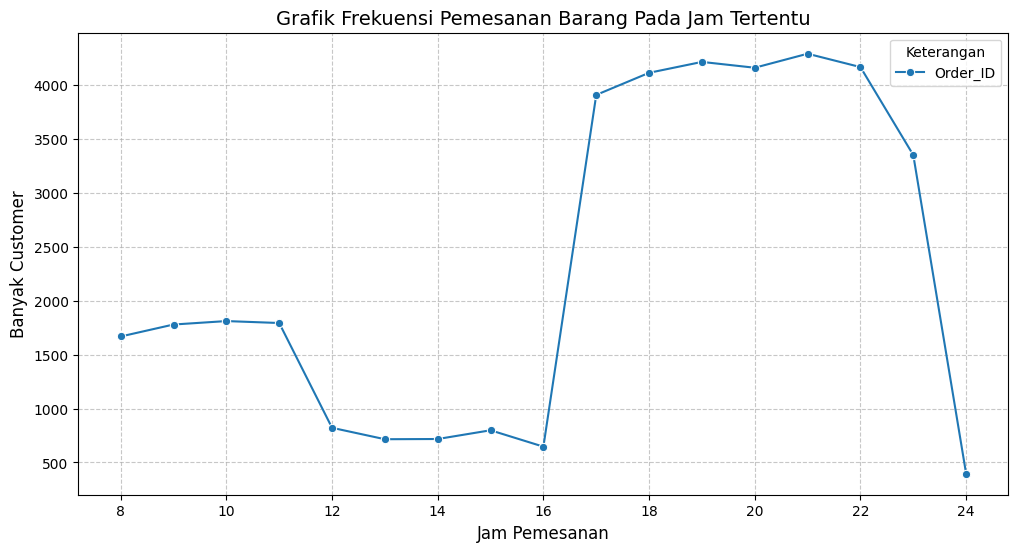

In [25]:
# Mengelompokkan data berdasarkan 'Order_Time_Hour' dan menghitung jumlah 'Order_ID'.
order_count_by_hour = df.groupby('Order_Time_Hour')['Order_ID'].count().reset_index()

# Plotting menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_count_by_hour, x='Order_Time_Hour', y='Order_ID', marker='o', label='Order_ID')

# Set untuk label dan titel
plt.xlabel('Jam Pemesanan', fontsize=12)
plt.ylabel('Banyak Customer', fontsize=12)
plt.title('Grafik Frekuensi Pemesanan Barang Pada Jam Tertentu', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Keterangan')

plt.show()

* Dari grafik di atas dapat dilihat frekuensi pembelian barang dan delivery Amazon selama 3 bulan, dimana pembelian di mulai paling pagi di `jam 8` dan paling malam adalah `jam 12 malam`. Dapat terlihat juga waktu paling banyak/rush hour dalam delivery ada di `jam 4 sore hingga 12 malam`, dimana puncaknya berada di `jam 9 malam`.

**------------------------ Analisis Data Area Urban -----------------------**

Setelah mendapat informasi mengenai delivery secara keseluruhan di semua Area negara X. Sekarang saya hanya akan berfokus kepada data Area Urban, karena analisis dari daerah ini yang memang ingin diketahui oleh atasan saya, dan juga untuk menjawab problem statement yang sudah dibuat.

In [26]:
# Memisahkan data Area Urban dan dimasukan ke dalam variabel baru
urban = df[df['Area'] =='Urban']
urban

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min)
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.02,Very Good,11,15.0,105.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55,Good,8,15.0,115.0
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,2024-10-24 21:20:00,2024-10-24 21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys,4.61,Very Good,21,10.0,120.0
18,vwmc439983136,21,4.7,22.552672,88.352885,22.582672,88.382885,2022-02-15,2024-10-24 21:15:00,2024-10-24 21:30:00,Windy,Jam,motorcycle,Urban,75,Jewelry,4.54,Very Good,21,15.0,60.0
25,edrh271340988,27,5.0,26.849596,75.800512,26.879596,75.830512,2022-04-05,2024-10-24 20:35:00,2024-10-24 20:40:00,Stormy,Jam,motorcycle,Urban,90,Cosmetics,4.47,Very Good,20,5.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43710,lfkn431158159,21,4.7,22.760072,75.892574,22.810072,75.942574,2022-04-03,2024-10-24 17:55:00,2024-10-24 18:10:00,Windy,Medium,motorcycle,Urban,140,Jewelry,7.56,Very Good,17,15.0,125.0
43712,dnoa676122688,24,4.5,23.399250,85.390464,23.409250,85.400464,2022-04-03,2024-10-24 09:15:00,2024-10-24 09:30:00,Windy,Low,motorcycle,Urban,50,Electronics,1.51,Very Good,9,15.0,35.0
43716,porw124204768,22,4.9,19.875908,75.358888,19.895908,75.378888,2022-02-11,2024-10-24 09:30:00,2024-10-24 09:45:00,Cloudy,Low,van,Urban,60,Cosmetics,3.05,Very Good,9,15.0,45.0
43727,ytod825048116,20,4.9,21.186608,72.794136,21.216608,72.824136,2022-03-03,2024-10-24 20:25:00,2024-10-24 20:40:00,Sandstorms,Jam,motorcycle,Urban,90,Books,4.56,Very Good,20,15.0,75.0


* Berikut merupakan data dari Area Urban yang sudah saya pisahkan dari data keseluruhan. Terlihat jumlah rows mencapai 8710 rows, jumlah data masih sangat banyak dan representatif.

* Saya ingin melihat bagaimana kondisi modus, mean, dan median di seluruh column area Urban

In [27]:
# Perhitungan modus area Urban
modusurban = {
    'Agent_Age': urban['Agent_Age'].mode().iloc[0],
    'Agent_Rating': urban['Agent_Rating'].mode().iloc[0],
    'Delivery_Time(min)': urban['Delivery_Time(min)'].mode().iloc[0],
    'Order_Pickup_Time(min)': urban['Order_Pickup_Time(min)'].mode().iloc[0],
    'Order_Time_Hour': urban['Order_Time_Hour'].mode().iloc[0],
    'Start_to_End_Time(min)' : urban['Start_to_End_Time(min)'].mode().iloc[0],
    'Jarak(km)': urban['Jarak(km)'].mode().iloc[0],
    'Category': urban['Category'].mode().iloc[0],
    'Vehicle': urban['Vehicle'].mode().iloc[0],
    'Weather': urban['Weather'].mode().iloc[0],
    'Traffic': urban['Traffic'].mode().iloc[0]
}
# Menjadikan perhitungan modus ke bentuk dataframe
modeurban_df = pd.DataFrame(list(modusurban.items()), columns=['Column', 'Mode'])
modeurban_df

,Column,Mode
0,Agent_Age,27
1,Agent_Rating,4.7
2,Delivery_Time(min),70.0
3,Order_Pickup_Time(min),5.0
4,Order_Time_Hour,22
5,Start_to_End_Time(min),75
6,Jarak(km),1.51
7,Category,Books
8,Vehicle,motorcycle
9,Weather,Sunny


Untuk area Urban ditemukan informasi seperti ini:
- Delivery Agent Amazon paling banyak berumur `27 tahun` (Agent_Age)	
- Rating yang paling sering diberikan oleh pembeli kepada delivery agent adalah `4.7` (Agent_Rating)
- Waktu paling banyak yang dibutuhkan untuk kurir mengantarkan barang adalah `70` menit (Delivery_Time(min))
- Waktu paling banyak yang dibutuhkan untuk kurir mengambil barang ke toko penjual adalah `5` menit (Order_Pickup_Time(min))
- Waktu paling banyak yang dibutuhkan untuk pembeli dari pertama kali order hingga order selesai adalah `75` menit (Start_to_End_Time(min))
- Pemesanan barang terbanyak ada di jam `22`/`10 malam` (Order_Time_Hour)
- Jarak delivery yang paling sering di tempuh oleh kurir adalah `1.51` km (Jarak(km))
- Kategori barang yang paling sering dipesan oleh pembeli adalah kategori `books` (Category)
- Tipe kendaraan yang paling sering digunakan oleh kurir adalah `motorcycle` (Vehicle)
- Keadaan cuaca pada negara X yang paling sering dihadapi oleh kurir adalah `sunny` (Weather)
- Tingkat kemacetan lalu lintas negara X yang paling sering dihadapi oleh kurir adalah `rendah` (Traffic)

In [28]:
# Menghitung mean dan median dari seluruh column numerik di df
mean_values1 = urban.mean(numeric_only=True)
median_values1 = urban.median(numeric_only=True)
# membuat tabel untuk seluruh mean dan median
mean_table1 = pd.DataFrame(mean_values1, columns=['Mean Urban'])
median_table1 = pd.DataFrame(median_values1, columns=['Median Urban'])

In [29]:
mean_table1

,Mean Urban
Agent_Age,28.889323
Agent_Rating,4.669414
Store_Latitude,18.762393
Store_Longitude,76.911907
Drop_Latitude,19.006938
Drop_Longitude,76.970949
Start_to_End_Time(min),109.894145
Jarak(km),29.626308
Order_Time_Hour,17.196441
Order_Pickup_Time(min),9.970723


In [30]:
median_table1

,Median Urban
Agent_Age,28.000000
Agent_Rating,4.700000
Store_Latitude,19.065838
Store_Longitude,76.616792
Drop_Latitude,19.135831
Drop_Longitude,76.649103
Start_to_End_Time(min),105.000000
Jarak(km),7.770000
Order_Time_Hour,18.000000
Order_Pickup_Time(min),10.000000


* Dapat di lihat dari display data-data di atas, value tidak beda terlalu jauh dari data keseluruhan. Hanya berbeda tipis, data masih termasuk bagus dan representatif

**Visualisasi Data Area Urban**

`Selanjutnya saya akan membuat visualisasi data untuk area Urban. Saya akan membuat visualisasi mengenai persentase kendaraan, traffic, dan cuaca.`

In [31]:
# Membuat fungsi untuk membuat piechart menggunakan seaborn
def pie_chart(column, title):
    data = urban[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))
    plt.title(title)
    plt.axis('equal')
    plt.show()

*Visualisasi Persentase Vehicle*

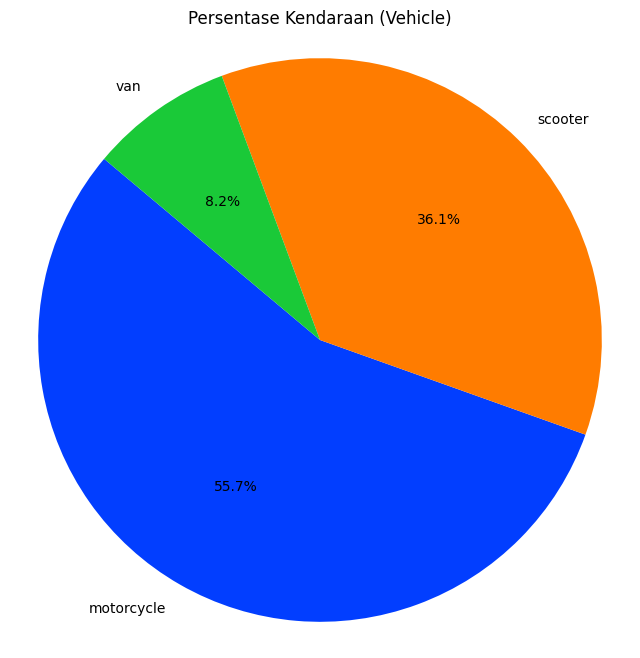

In [32]:
# Membuat piechart dari column vehicle menggunakan fungsi `pie_chart`
pie_chart('Vehicle', 'Persentase Kendaraan (Vehicle)')

* Dapat dilihat visualisasi data menunjukan kendaraan yang paling sering digunakan di area `Urban` adalah `motorcycle` persentase sebesar 55%. Yang paling sedikit adalah `van` dengan persentase 8.2%

*Visualisasi Persentase Traffic*

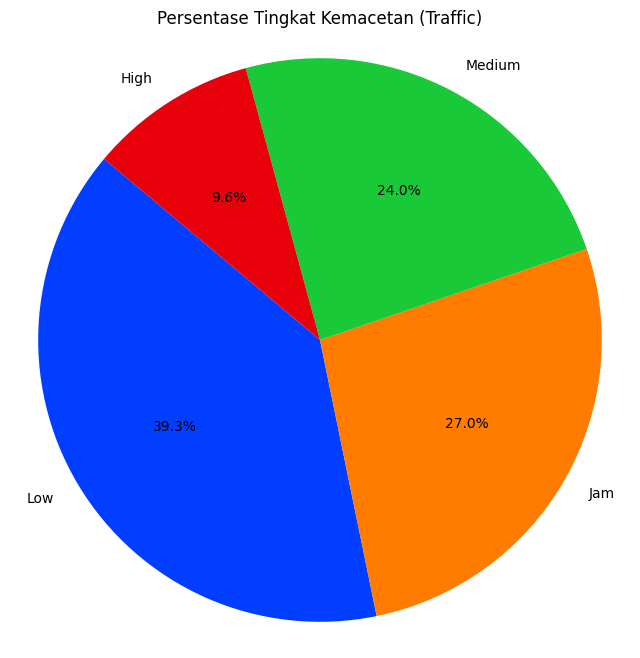

In [33]:
# Membuat piechart dari column traffic menggunakan fungsi `pie_chart`
pie_chart('Traffic', 'Persentase Tingkat Kemacetan (Traffic)')

* Pada visualisasi tingkat kemacetan pada area Urban cenderung `low` di angka 39.3%, tetapi persentase macet total juga besar sebesar `27%`.

*Visualisasi Persentase Wheater*

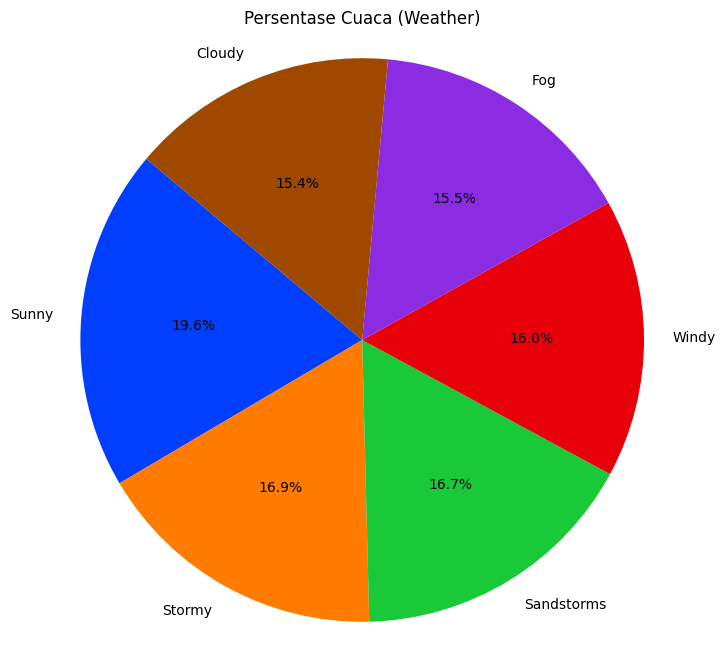

In [34]:
# Membuat piechart dari column weather menggunakan fungsi `pie_chart`
pie_chart('Weather', 'Persentase Cuaca (Weather)')

* Pada visualisasi keadaan cuaca cerah merupakan cuaca yang paling banyak di temukan dengan persentase sebesar `19.6%`. Tetapi untuk cuaca seluruhnya tidak berbeda jauh satu sama lain dalam hal persentase, jadi bisa saya simpulkan cuaca beragam pada area Urban.

`Selanjutnya saya ingin mengetahui efficiency dari masing-masing vehicle dalam mengantarkan barang.`

In [35]:
urban.groupby('Vehicle')[['Start_to_End_Time(min)','Jarak(km)']].mean()

,Start_to_End_Time(min),Jarak(km)
Vehicle,,
motorcycle,115.958746,34.125198
scooter,102.261284,23.280426
van,102.368715,27.047430


* Ditemukan motor memiliki delivery time keseluruhan terlama di bandingkan schooter dan van, tetapi ini bukanlah acuan untuk melihat efficiency dari vehicle itu sendiri. Untuk itu kita harus juga melakukan perhitungan kecepatan rata-rata, dimana `KECEPATAN RATA-RATA = JARAK/WAKTU`

In [54]:
# Menghitung kecepatan rata-rata semua vehicle masih bentuk km/minute
urban.loc[:, 'Average_Speed(km_per_min)'] = urban['Jarak(km)'] / urban['Start_to_End_Time(min)']

# melakukan konversi dari km/minute menjadi km/hour
average_speed_per_vehicle = urban.groupby('Vehicle')['Average_Speed(km_per_min)'].mean() * 60  # Convert to km/h

average_speed_per_vehicle

Vehicle
motorcycle    22.451143
scooter       16.958605
van           27.038392
Name: Average_Speed(km_per_min), dtype: float64

* Didapatkan hasil sebagai berikut:
Van memiliki kecepatan rata-rata tertinggi diantara semua vehicle yang ada dengan `27.03km/hour`, kemudian motor `22.45` lalu schooter `16.95`. Hal ini nantinya bisa menjadi pertimbangan untuk rekomendasi, mungkin bisa pada area Urban delivery menggunakan van di perbanyak. Tetapi di sisi lain van kurang ramah lingkungan, dan juga harga bahan bakar yang lebih mahal dan boros di bandingkan motorcycle. Maka dari itu menurut saya motor dengan kecepatan 22.45 km/jam lebih efficient di bandingkan van, ditambah lagi mungkin masih ada faktor-faktor seperti traffic jam yang cukup tinggi di area Urban. Mungkin ini juga menjadi alasan mengapa pada area Urban kurir paling banyak menggunakan motorcycle.

`Setelah mengetahui efficiency dari vehicle. Saya akan mencari tau rating yang diberikan pembeli di area Urban`

In [37]:
# Menunjukan rating count dari seluruh delivery di area Urban
urban['Tingkat_Rating'].value_counts()

Tingkat_Rating
Very Good    7579
Good          969
Bad           134
Poor           15
Very Poor      13
Name: count, dtype: int64

(Penjabaran disatukan di bawah)

In [38]:
# Melihat rata-rata waktu delivery keseluruhan terhadap rating
urban.groupby('Tingkat_Rating')[['Start_to_End_Time(min)']].mean().sort_values('Start_to_End_Time(min)')

,Start_to_End_Time(min)
Tingkat_Rating,
Very Good,102.555218
Good,157.667699
Very Poor,159.461538
Poor,164.066667
Bad,168.641791


* Dari total `8710 pengiriman barang` area Urban mendapatkan `7579` rating very good (diatas 4.5). Ini artinya area Urban sudah sangat baik secara rating.
* Jika di lihat pada tabel rata-rata waktu delivery keseluruhan terhadap rating. Dapat terindikasi bahwa rating very good dan good memiliki beda waktu yang cukup signifikan. Rata-rata delivery dinilai very good karena rata-rata waktu `102.5 menit` sedangkan selisihnya dengan good `157.6 menit` cukup jauh yaitu `+-55 menit`. mungkin hal ini bisa dijadikan acuan juga dalam evaluasi selanjutnya.

**Visualisasi Data Pengaruh Waktu Pengiriman Dengan Rating**

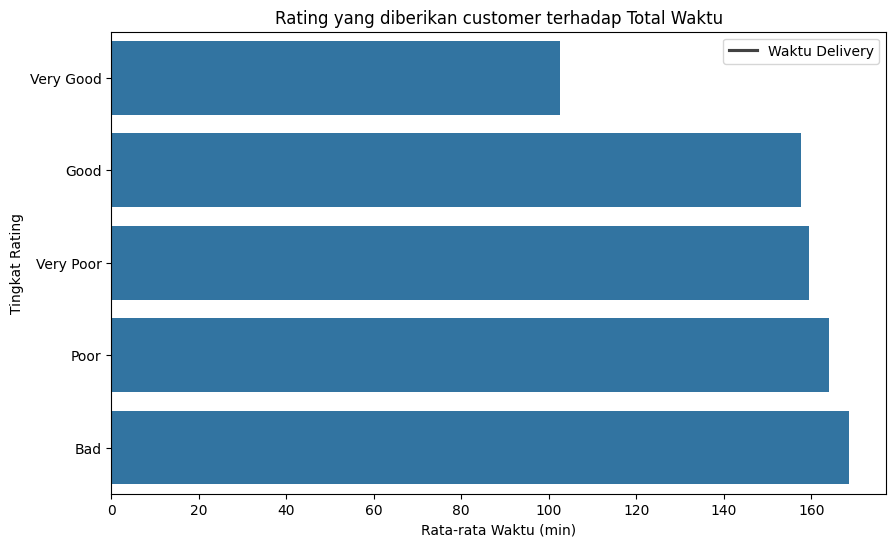

In [39]:
# Menghitung rata-rata 'Start_to_End_Time(min)' berdasarkan 'Tingkat_Rating' dan mengurutkan nilainya.
rating_time_mean = urban.groupby('Tingkat_Rating')['Start_to_End_Time(min)'].mean().sort_values(ascending=True)
# Konfigurasi grafik menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_time_mean.values, y=rating_time_mean.index, orient='h')
plt.title('Rating yang diberikan customer terhadap Total Waktu')
plt.xlabel('Rata-rata Waktu (min)')
plt.ylabel('Tingkat Rating')
plt.legend(['Waktu Delivery'], loc='upper right')
plt.show()

* Visualisasi data ini memperkuat bukti bahwa terdapat hubungan antara total waktu antar dengan rating, dimana `semakin lama total waktu antar, maka rating akan semakin buruk`.

*Melihat Hal Lain Yang Mungkin Mempengaruhi Delivery Time Keseluruhan*

Keadaan Cuaca

In [40]:
# Melihat hubungan antara weather dan delivery time
urban.groupby('Weather')[['Start_to_End_Time(min)']].mean().sort_values('Start_to_End_Time(min)',ascending=True)

,Start_to_End_Time(min)
Weather,
Sunny,91.654364
Sandstorms,109.168385
Windy,111.806753
Stormy,112.137135
Fog,117.754086
Cloudy,121.596111


* Dapat terlihat jika keadaan `cuaca cerah maka delivery time akan jauh lebih cepat dibandingkan cuaca berawan`. Ada keterkaitan juga anatara cuaca dengan waktu delivery keseluruhan

Keadaan Lalu lintas

In [41]:
# Melihat hubungan antara traffic dan delivery time
urban.groupby('Traffic')[['Start_to_End_Time(min)']].mean().sort_values('Start_to_End_Time(min)',ascending=True)

,Start_to_End_Time(min)
Traffic,
Low,91.422358
Medium,112.492587
High,115.242857
Jam,132.570761


* Dapat terlihat sudah sewajarnya `semakin rendah tingkat kemacetan maka akan semakin cepat pengiriman barang`.

### **Analisis Distribusi dan Density Total Waktu Delivery**

In [43]:
urban.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Start_to_End_Time(min),Category,Jarak(km),Tingkat_Rating,Order_Time_Hour,Order_Pickup_Time(min),Delivery_Time(min),Average_Speed(km_per_min)
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-10-24 11:30:00,2024-10-24 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.02,Very Good,11,15.0,105.0,0.025167
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-10-24 08:30:00,2024-10-24 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55,Good,8,15.0,115.0,0.011923
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,2024-10-24 21:20:00,2024-10-24 21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys,4.61,Very Good,21,10.0,120.0,0.035462
18,vwmc439983136,21,4.7,22.552672,88.352885,22.582672,88.382885,2022-02-15,2024-10-24 21:15:00,2024-10-24 21:30:00,Windy,Jam,motorcycle,Urban,75,Jewelry,4.54,Very Good,21,15.0,60.0,0.060533
25,edrh271340988,27,5.0,26.849596,75.800512,26.879596,75.830512,2022-04-05,2024-10-24 20:35:00,2024-10-24 20:40:00,Stormy,Jam,motorcycle,Urban,90,Cosmetics,4.47,Very Good,20,5.0,85.0,0.049667


##### *Saya ingin mengetahui mean, median, standar deviasi, skewness, dan kurtosis dari kolom Start_to_End_Time(min). Saya lakukan untuk mengetahui apakah persebaran data normal datau tidak dengan skewness dan juga untuk mengetahui tipe  kurtosisnya.*

In [44]:
mean_totalw = urban['Start_to_End_Time(min)'].mean()
median_totalw = urban['Start_to_End_Time(min)'].median()
std_totalw = urban['Start_to_End_Time(min)'].std()
skewness_totalw = urban['Start_to_End_Time(min)'].skew()
kurtosis_totalw = urban['Start_to_End_Time(min)'].kurt()

# Melakukan display data yang sudah dibuat
deskriptif = pd.DataFrame({
    '': ['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'],
    'Start_to_End_Time(min)': [mean_totalw, median_totalw, std_totalw, skewness_totalw, kurtosis_totalw]
})
deskriptif


,,Start_to_End_Time(min)
0,Mean,109.894145
1,Median,105.000000
2,Standard Deviation,48.327371
3,Skewness,0.450658
4,Kurtosis,0.020996


* Data total waktu delivery (Start_to_End_Time(min)) memiliki rata-rata yang sangat dekat dengan median, menunjukkan bahwa distribusi cenderung simetris. Terdapat sedikit kemiringan positif (0.451), yang mengindikasikan adanya beberapa nilai tinggi yang menyebabkan ekor distribusi memanjang ke kanan, namun pengaruhnya tidak signifikan. Kurtosis yang mendekati nol menunjukkan bahwa bentuk distribusi serupa dengan distribusi normal, dengan puncak yang tidak terlalu tajam maupun terlalu datar. Standar deviasi yang cukup besar menunjukkan adanya variasi waktu yang cukup signifikan di antara data. 

* Secara keseluruhan, distribusi ini hampir normal, dengan sedikit kemiringan ke kanan dan kelancipan yang serupa dengan distribusi normal. Tidak ada indikasi outlier yang ekstrem atau penyimpangan besar dari distribusi normal.

**Visualisasi Persebaran Data Total Waktu Delivery**

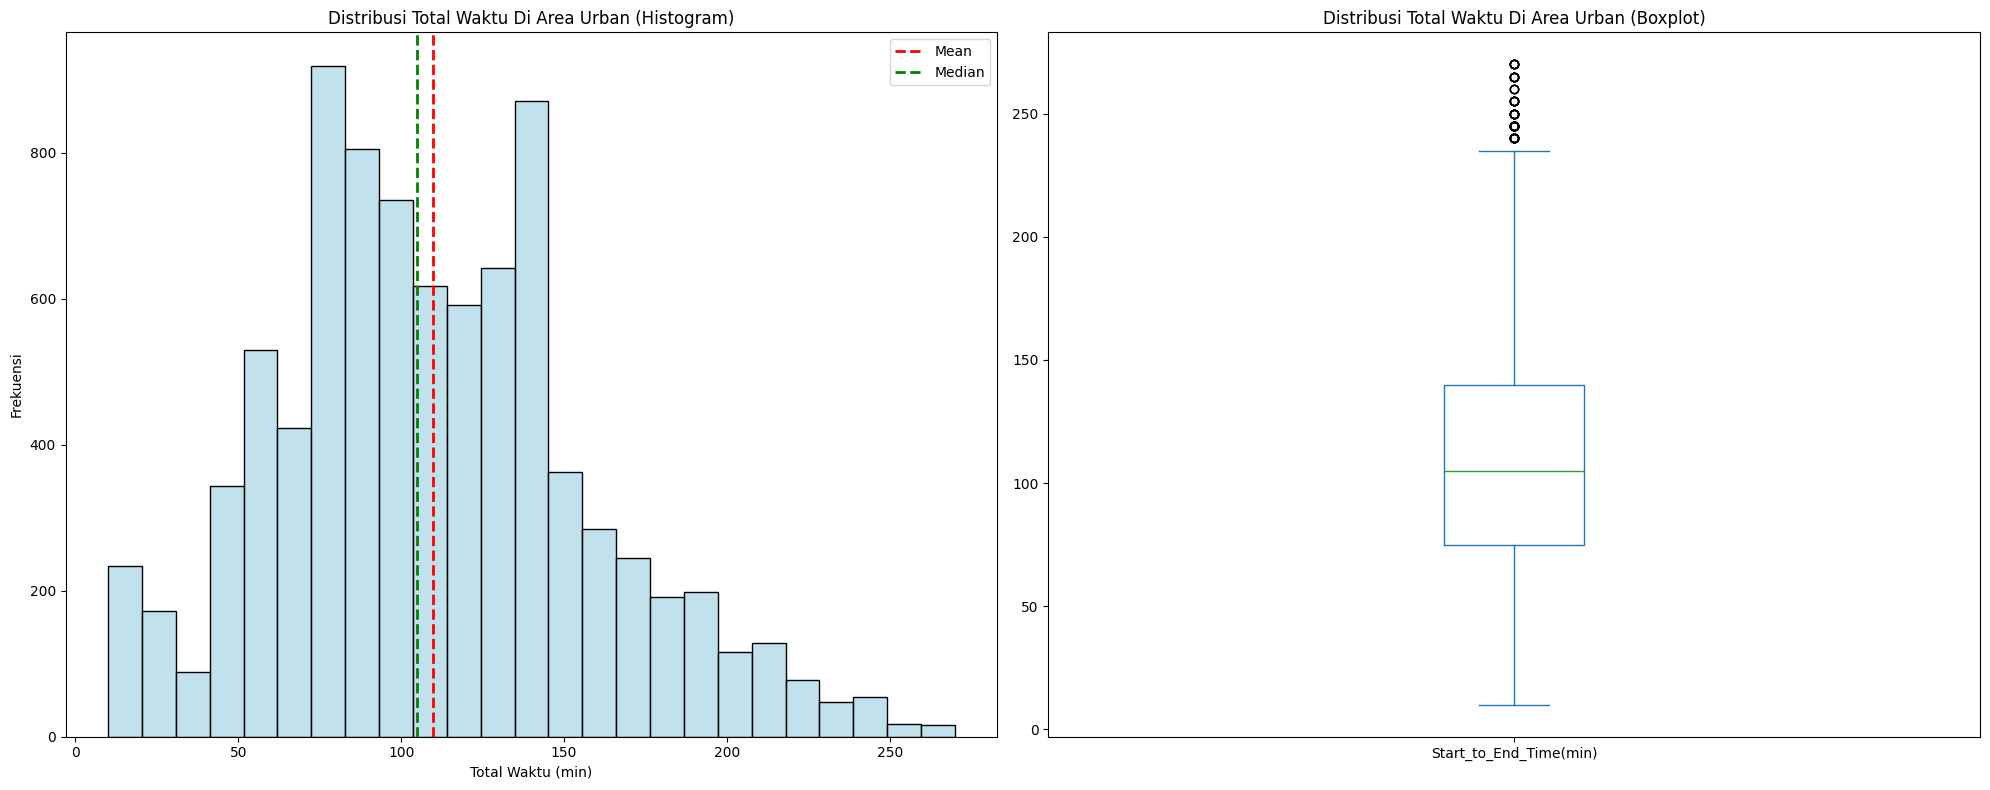

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Axis Kiri (Histogram)
sns.histplot(urban['Start_to_End_Time(min)'], bins=25, color='lightblue', kde=False, ax=ax1)
ax1.axvline(urban['Start_to_End_Time(min)'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax1.axvline(urban['Start_to_End_Time(min)'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
ax1.set_title('Distribusi Total Waktu Di Area Urban (Histogram)')
ax1.set_xlabel('Total Waktu (min)')
ax1.set_ylabel('Frekuensi')
ax1.legend()

# Axis Kanan (Boxplot)
urban['Start_to_End_Time(min)'].plot(kind='box', title='Distribusi Total Waktu Di Area Urban (Boxplot)', ax=ax2)

# Show the plot
plt.tight_layout()
plt.show()

* Bisa di lihat pada visualisasi di atas, sebaran data cenderung normal dengan mean dan median yang saling mendekati. Boxplot saya gunakan untuk melihat apakah ada indikasi outlier. Nanti saya akan uji lagi outliernya menggunakan teknik z-score karena data cenderung distribusi normal

Start_to_End_Time(min) skewness: 0.45065832472932604
Start_to_End_Time(min) kurtosis: 0.02099618753644661


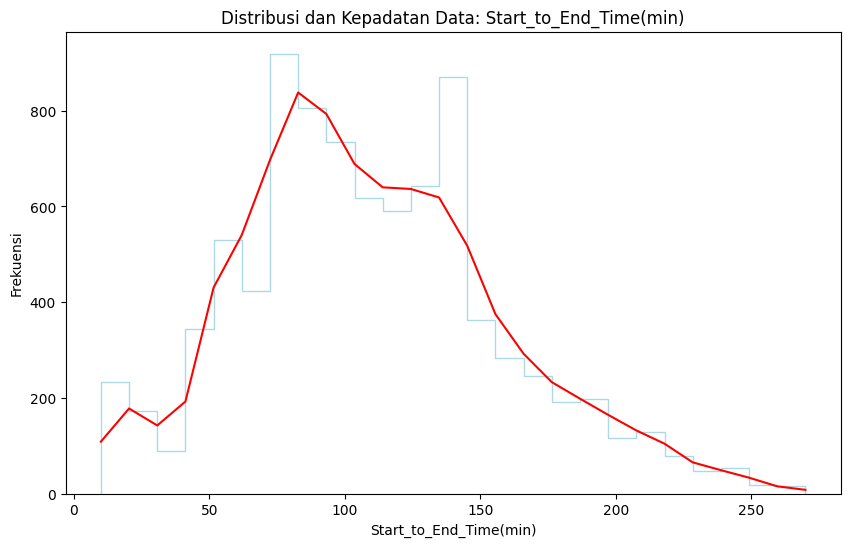

In [46]:
numcols = ['Start_to_End_Time(min)']

# Membuat histogram dengan estimasi kepadatan menggunakan gaussian_kde untuk setiap kolom numerik
for col in numcols:
    column_data = urban[col]
    print(f"{col} skewness: {column_data.skew()}")
    print(f"{col} kurtosis: {column_data.kurt()}")

    # Kalkulasi densitas/kepadatan data menggunakan gaussian_kde
    density = stats.gaussian_kde(column_data)
    
    # Plot histogram dan density
    plt.figure(figsize=(10, 6))
    n, x, _ = plt.hist(column_data, histtype='step', bins=25, color='lightblue')
    plt.plot(x, density(x) * len(column_data) * (x[1] - x[0]), color='red')
    plt.title(f'Distribusi dan Kepadatan Data: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
    print('\n')

* Dapat di lihat visualisasi menunjukan sebaran data yang cukup normal. Hal ini diperkuat dengan nilai skewness `0.45` yang berada di antara `-0.5 hingga 0.5` artinya data memiliki distribusi yang cenderung normal.

**Outlier Check With Z-Score Method**

Akan menggunakan Z-Score method karena data distribusi normal

In [56]:
urban.loc[:, 'z_score'] = zscore(urban['Start_to_End_Time(min)'])
# Pada metode Z-Score akan dikatakan outliers apabila Z-Score lebih dari 3 dan kurang dari -3
threshold = 3
# Identify outliers based on z-score
outliers_zscore = urban[(urban['z_score'].abs() > threshold)]
# Display the number of outliers
num_outliers_zscore = outliers_zscore.shape[0]
# Output the number of outliers
num_outliers_zscore

23

* Ditemukan sebanyak `23` data outlier dari seluruh column Start_to_End_Time(min) di area Urban

In [48]:
print('Persentase outliers:', (23/8710)*100, '%')

Persentase outliers: 0.26406429391504016 %


* Outlier sebesar `0.26%` dari jumlah seluruh data Urban

**Melakukan Pembersihan Outlier**

In [49]:
urban_clean = urban[(urban['z_score'].abs() <= threshold)]
urban_clean['z_score'].count()

np.int64(8687)

* Setelah dilakukan penghapusan outlier, `8687` data tersisa.

*Visualisasi Total Waktu Delivery Setelah Penghapusan Outlier*

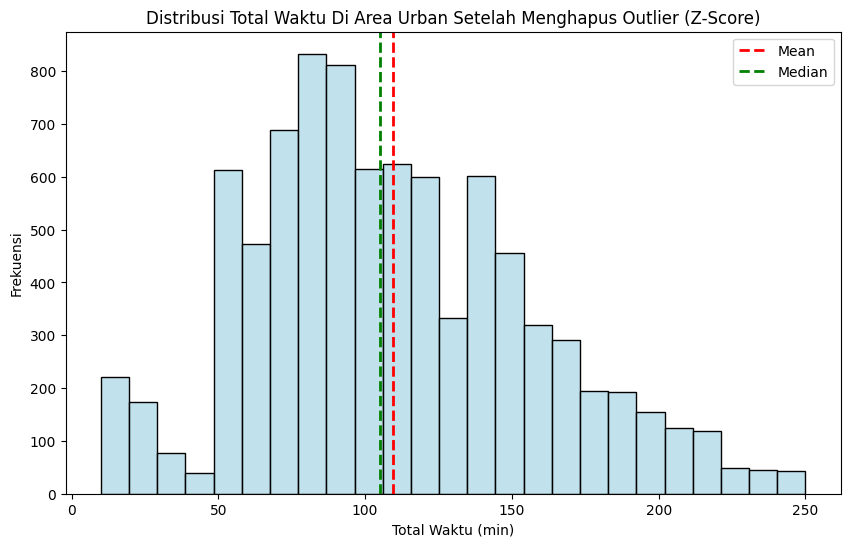

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(urban_clean['Start_to_End_Time(min)'], bins=25, color='lightblue', kde=False)
plt.axvline(urban_clean['Start_to_End_Time(min)'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(urban_clean['Start_to_End_Time(min)'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribusi Total Waktu Di Area Urban Setelah Menghapus Outlier (Z-Score)')
plt.xlabel('Total Waktu (min)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

* Data masih kurang lebih sama, karena jumlah outlier sangat kecil sehingga tidak signifikan perubahannya saat outlier dihapus

**Central Tendency Area Urban**

In [51]:
mean_totalw = urban_clean['Start_to_End_Time(min)'].mean()
median_totalw = urban_clean['Start_to_End_Time(min)'].median()

# Melakukan display data yang sudah dibuat
i = pd.DataFrame({
    '': ['Mean', 'Median'],
    'Start_to_End_Time(min)': [mean_totalw, median_totalw]
})
i

,,Start_to_End_Time(min)
0,Mean,109.489812
1,Median,105.000000


* Rata-Rata total delivery time pada area urban tanpa outlier adalah `109.48 menit`
* Nilai Median total delivery time pada area urban tanpa outlier adalah `105 menit`

In [52]:
mode_totalw = urban_clean['Start_to_End_Time(min)'].mode().iloc[0]
print(f'Mode Dari Kolom Start_to_End_Time(min) adalah: {mode_totalw}')

Mode Dari Kolom Start_to_End_Time(min) adalah: 75


* Waktu yang paling sering muncul di total delivery time pada area urban tanpa outlier adalah `75 menit`

**Measure of Variance Area Urban**

In [53]:
variance_clean = urban_clean['Start_to_End_Time(min)'].var()
standard_deviation_clean = urban_clean['Start_to_End_Time(min)'].std()
range_value_clean = urban_clean['Start_to_End_Time(min)'].max() - urban_clean['Start_to_End_Time(min)'].min()
iqr_clean = urban_clean['Start_to_End_Time(min)'].quantile(0.75) - urban_clean['Start_to_End_Time(min)'].quantile(0.25)

mov = pd.DataFrame({
    'Measure': ['Variance', 'Standard Deviation', 'Range', 'Interquartile Range'],
    'Value': [variance_clean, standard_deviation_clean, range_value_clean, iqr_clean]
})
mov

,Measure,Value
0,Variance,2279.709745
1,Standard Deviation,47.746306
2,Range,240.000000
3,Interquartile Range,65.000000


* Setelah menghapus outlier, variansi dan standar deviasi sedikit menurun, mengindikasikan bahwa distribusi data menjadi lebih terpusat di sekitar rata-rata. Meskipun nilai rentang masih besar, penghapusan outlier membuat data terdistribusi lebih merata dengan pengaruh yang lebih sedikit dari nilai-nilai ekstrem. IQR yang tetap sama menunjukkan bahwa penyebaran data utama cukup stabil, baik sebelum maupun setelah penghapusan outlier. Secara keseluruhan, setelah outlier dihapus, data menjadi lebih terfokus dan terdistribusi lebih baik, dengan pengaruh dari nilai ekstrem yang minim terhadap analisis.

### **Statistik Inferensial**

*Confidence Interval*

In [59]:
mean_value = np.mean(urban_clean['Start_to_End_Time(min)'])
std_dev = np.std(urban_clean['Start_to_End_Time(min)'], ddof=1)
sample_size = len(urban_clean['Start_to_End_Time(min)'])
confidence_level = 0.95   # Saya menggunkan confidence level 95%

# Menghitung Z-Value
z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Margin of error
margin_of_error = z_value * (std_dev / np.sqrt(sample_size))

# Confidence interval
lower_bound = mean_value - margin_of_error
upper_bound = mean_value + margin_of_error

waktulowup = pd.DataFrame({
    '': ['Batas Bawah', 'Batas Atas'],
    'Total Waktu Delivery': [lower_bound, upper_bound]
}).round(2)

waktulowup

,,Total Waktu Delivery
0,Batas Bawah,108.49
1,Batas Atas,110.49


* Dari batas atas dan batas bawah yang sudah kita dapatkan, kita dapat menyimpulkan bahwa pada area Urban sebaiknya dapat menyelesaikan waktu delivery keseluruhan dalam rentang waktu `108.49 - 110.49 menit`. Saya akan mengambil `109.49 menit` sebagai waktu paling ideal untuk total waktu delivery.

*Visualisasi Total Waktu Ideal Area Urban*

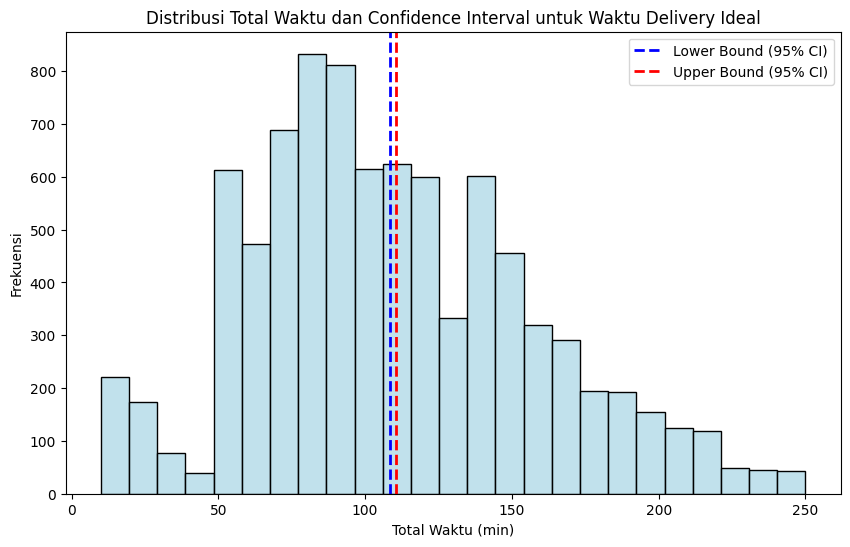

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(urban_clean['Start_to_End_Time(min)'], bins=25, color='lightblue', kde=False)
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')
plt.title('Distribusi Total Waktu dan Confidence Interval untuk Waktu Delivery Ideal')
plt.xlabel('Total Waktu (min)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

* Pada visualisasi kita bisa lihat rentang waktu ideal untuk menyelesaikan pengantaran barang terletak di mana.

#### **Hipotesis Testing**

*One Sample Two Tailed Z-Test*

* `(H0)`: Waktu ideal pengiriman 'Start_to_End_Time(min)' adalah sama dengan atau kurang dari 109.49 menit.
* `(H1)`: Waktu ideal pengiriman 'Start_to_End_Time(min)' lebih dari 109.49 menit.

In [62]:
# Saya memilih menggunakan Z-Test karena sample sangat banyak, jika sampel sedikit maka saya akan menggunakan T-Test
waktu_ideal = 109.49
sample_mean = urban_clean['Start_to_End_Time(min)'].mean()
sample_std = urban_clean['Start_to_End_Time(min)'].std(ddof=1)
sample_size = len(urban_clean['Start_to_End_Time(min)'])
confidence_level = 0.95

# Menghitung Z-Stat
test_stat = (sample_mean - waktu_ideal) / (sample_std / np.sqrt(sample_size))

# Menghitung P-Value
p_value = 2 * (1 - stats.norm.cdf(abs(test_stat)))

print(f"Z-Statistic: {test_stat}")
print(f"P-Value: {p_value}")

Z-Statistic: -0.0003662797556211935
P-Value: 0.99970775104459


* Dari test yang sudah kita lakukan, didapatkan Z-Stat bernilai `-0.00036` ini merupakan nilai yang sangat kecil yang menandakan bahwa `rata-rata total waktu pengiriman ('Start_to_End_Time(min)') hampir sama dengan waktu ideal pengiriman (109.49 menit)`. Mengingat juga waktu rata-rata total waktu pengiriman adalah `109.89 menit`.
* Untuk P-Value, tingkat signifikansi yang kita gunakan adalah (0.05). Didapatkan nilai P-Value sebesar `0.999`, Karena P-Value lebih besar dari 0.05, maka kita `H0 GAGAL DITOLAK`.

Kesimpulan:
* Secara umum, hasil ini menunjukkan bahwa rata-rata total waktu pengiriman saat ini sudah cukup sesuai dengan target tetapi sedikit di atas waktu ideal `(berbeda tetapi tidak signifikan)`. Selisih waktu antara rata-rata total waktu pengiriman dan waktu ideal pengiriman hanya `0.4 menit/24 detik`. Jika perusahaan menilai 24 detik merupakan waktu yang signifikan dalam pengiriman barang, maka harus dilakukan adanya peningkatan layanan delivery di area Urban.
* Mengingat rating very good yang diberikan pelanggan memiliki rata-rata total delivery time `102.55 menit` saya sebagai analyst menyarankan agar perusahaan Amazon meningkatkan kecepatan delivery service agar dapat mencapai customer satisfaction yang lebih baik.

*Hubungan Antara Tingkat_Rating Dengan Agent_Age*

* Saya memilih Spearman Test karena Tingkat_Rating merupakan data `ordinal yang memiliki urutan`, dan tidak ada kepastian bahwa hubungan antara Agent_Age dan Tingkat_Rating bersifat `linier`.

In [67]:
agent_rating = urban_clean['Tingkat_Rating']
agent_age = urban_clean['Agent_Age']

# Menggunakan Spearman method
corr, p_value = spearmanr(agent_rating, agent_age)

print('Spearman-Correlation:',corr)
print('P-Value:',p_value)

Spearman-Correlation: -0.16878039025736355
P-Value: 1.5830614043986532e-56


* Korelasi Spearman yang negatif mengindikasikan bahwa agen dengan usia yang lebih tua `(>28 pada area Urban)` cenderung menerima rating yang sedikit lebih rendah, namun kekuatan hubungan ini lemah.
* Disisi lain P-Value yang sangat kecil `1.5830614043986532e-56` mengindikasikan bahwa hubungan hubungan antara usia agent dan rating yang diberikan pelanggan `signifikan secara statistik`.

Kesimpulan:
* Hasil ini menunjukkan keambiguan data, antara umur agen dan rating yang di dapat. Untuk membantu memahami data maka akan dilakukan visualisasi.

*Visualisasi Hubungan Antara Tingkat_Rating Dengan Agent_Age*

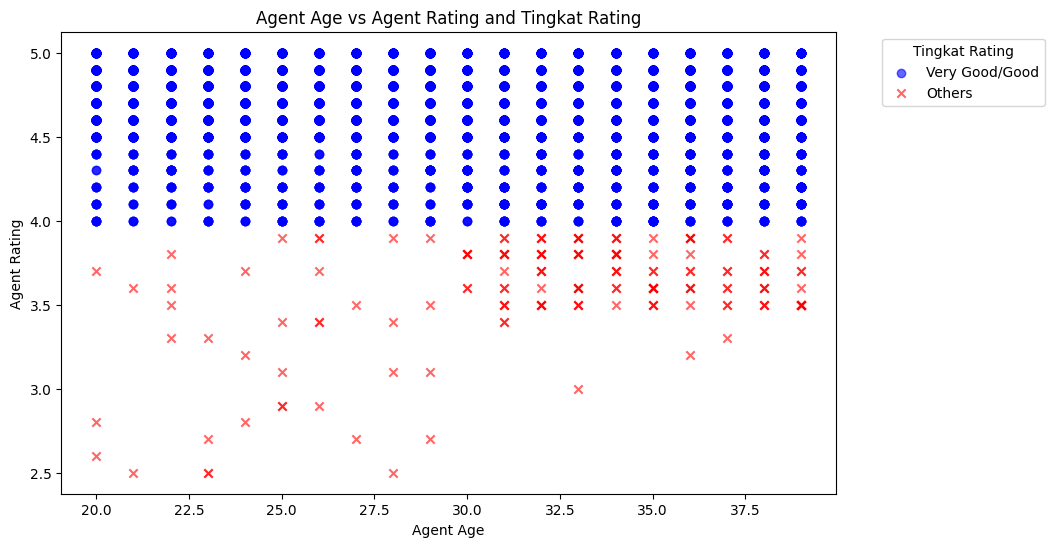

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Agent Age vs Agent Rating and Tingkat Rating')
ax.set_xlabel('Agent Age')
ax.set_ylabel('Agent Rating')

very_good_good_data = urban_clean[urban_clean['Tingkat_Rating'].isin(['Very Good', 'Good'])]
ax.scatter(
    very_good_good_data['Agent_Age'],
    very_good_good_data['Agent_Rating'],
    color='b',
    marker='o',
    label='Very Good/Good',
    alpha=0.6
)
other_data = urban_clean[~urban_clean['Tingkat_Rating'].isin(['Very Good', 'Good'])]
ax.scatter(
    other_data['Agent_Age'],
    other_data['Agent_Rating'],
    color='r',
    marker='x',
    label='Others',
    alpha=0.6
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Tingkat Rating')
plt.show()

* Ternyata setelah melakukan visualisasi, Agent berumur 30 tahun keatas memiliki nilai rating yang lebih stabil dibandingkan dengan agen berumur dibawah 30 tahun. Pada visualisasi ini juga ternyata terlihat bahwa rating agent berumur 30 tahun malah rata-rata di atas 3.5. Hal ini bisa menjadi acuan untuk perusahaan agar bida melihat kinerja agen dibawah umur 30 tahun, mengapa memiliki ke tidak stabilan dalam rating.

# **VII. Kesimpulan**

Dari hasil analisis di atas saya dapat menyimpulkan bahwa:
* Kategori barang yang paling sering di beli oleh pelanggan di area Urban adalah `buku`, maka dari itu buku bisa menjadi prioritas utama dalam pengiriman barang di area Urban, karena hal ini juga nantinya bisa menaikan `customer satisfactory level`.

* Pada seluruh area di negara X mulai dari Februari 2022 - April 2022, pembelian barang dimulai paling pagi di `jam 8 pagi` dan paling malam adalah `jam 12 malam`. Rentang waktu paling banyak terjadinya pengiriman barang (rush hour) berada di `jam 4 sore - 12 malam`, dimana puncak pengiriman terbanyak berada di `jam 9 malam`.

* Umur rata-rata agent di area Urban adalah `28.88 tahun ~ 29 tahun`. Setelah dilakukan test korelasi antara umur agen dengan rating yang diberikan pelanggan, didapatkan kecenderungan bahwa `agen yang lebih muda (umur under 28) mendapatkan rating yang cenderung lebih tinggi dibandingkan agen yang lebih tua (>28)`, meskipun perbedaannya tidak signifikan. Tetapi agent yang lebih tua memiliki rating yang cenderung lebih stabil di bandingkan agent berumur muda berdasarkan visualisasi data. Hal ini harus di pelajari lebih lanjut dan dicari penyebab mengapa agent berumur <30 tahun memiliki rating yang lebih tidak stabil di bandingkan dengan agent berumur diatas 30 tahun. Hal ini sangat penting untuk menjadi parameter batas umur dalam melakukan seleksi pegawai delivery agent baru di perusahaan Amazon di masa yang akan datang. Sebagai contoh: Amazon bisa hanya mencari employee delivery baru dengan rentang umur 28 keatas saja misalnya, karena rating agent berumur tua cenderung lebih stabil.

* Pada area urban terdapat `8710` data delivery. `7579 pelanggan menilai delivery sudah Very Good atau dengan rating di atas 4.5`. `969 pelanggan menilai delivery service Good atau dengan rating 4.0 - 4.4`. Sisanya `162 pelanggan menilai delivery service Bad - Very Poor 3.9 - 0`. Berdasarkan statistik pelanggan yang memberi nilai Very Good dan Good mencapai angka `8548 pelanggan` yang merupakan `98.14%` dari total seluruh order di area Urban. Hal ini merupakan hal yang sangat positif dan baik sekali. Perusahaan harus terus meningkatkan pelayanan dan mempertahankan rating baik ini kedepannya, agar customer satisfactory level bisa bertambah hingga `100%`.

* Waktu rata-rata yang dibutuhkan pelanggan dari mulai order hingga mendapatkan barang adalah `109.89 menit` dan ternyata setelah dilakukan perhitungan hipotesis waktu idealnya adalah `109.49 menit`. Secara umum, hasil ini menunjukkan bahwa rata-rata total waktu pengiriman saat ini sudah cukup sesuai dengan target tetapi sedikit di atas waktu ideal `(berbeda tetapi tidak signifikan)`.

* Menurut saya pribadi meningkatkan pelayanan pada area Urban masih diperlukan jika perusahaan ingin mendapatkan rating Very Good yang lebih banyak lagi di area ini. Rating Very Good memiliki rata-rata total delivery time `102.55 menit`, delivery service Amazon masih memerlukan peningkatan yang cukup signifikan jika ingin memenuhi standar tersebut mengingat rata-rata total delivery time di area Urban ini di angka `109.89 menit` dan idealnya di angka `109.49 menit`. Bahkan rata-rata total delivery time di area Urban belum menyentuh angka ideal (walaupun tidak signifikan perbedaannya). Maka dari itu layanan delivery Amazon masih harus di tingkatkan agar bisa mencapai target-target yang diinginkan oleh perusahaan untuk kedepannya.

Untuk rangkuman kesimpulan adalah sebagai berikut:
Buku adalah kategori yang paling sering dibeli, sehingga bisa menjadi prioritas utama dalam pengiriman untuk meningkatkan kepuasan pelanggan. Pada seluruh area di Negara X pembelian dimulai paling pagi jam 8 pagi dan berakhir jam 12 malam. Waktu pengiriman paling banyak terjadi antara jam 4 sore - 12 malam, dengan puncaknya di jam 9 malam. Rata-rata umur agen adalah 28.9 tahun. Agen yang lebih muda (di bawah 28) cenderung mendapatkan rating lebih tinggi tetapi tidak stabil daripada agen yang lebih tua (>28). Perusahaan perlu menggali lebih lanjut penyebabnya untuk menentukan kebijakan seleksi agen di masa depan. Dari 8710 data pengiriman, 8548 pelanggan (98.14%) menilai pengiriman `baik - sangat baik`. Perusahaan harus terus mempertahankan dan meningkatkan layanan agar customer satisfaction mencapai 100%. Rata-rata waktu pengiriman adalah 109.89 menit, sedikit di atas waktu ideal 109.49 menit, namun tidak signifikan. Meningkatkan layanan masih diperlukan untuk mencapai lebih banyak rating Very Good. Rata-rata total waktu pengiriman rating Very Good adalah 102.55 menit, sedangkan rata-rata di area Urban saat ini 109.89 menit, masih belum mencapai target 109.49 menit. Peningkatan layanan diperlukan untuk memenuhi standar yang diinginkan perusahaan.

In [70]:
# Expor CSV urban_clean untuk di olah menjadi dashboard
urban_clean.to_csv('urban_clean.csv', index=False)

In [75]:
df.to_csv('amazon_clean.csv', index=False)

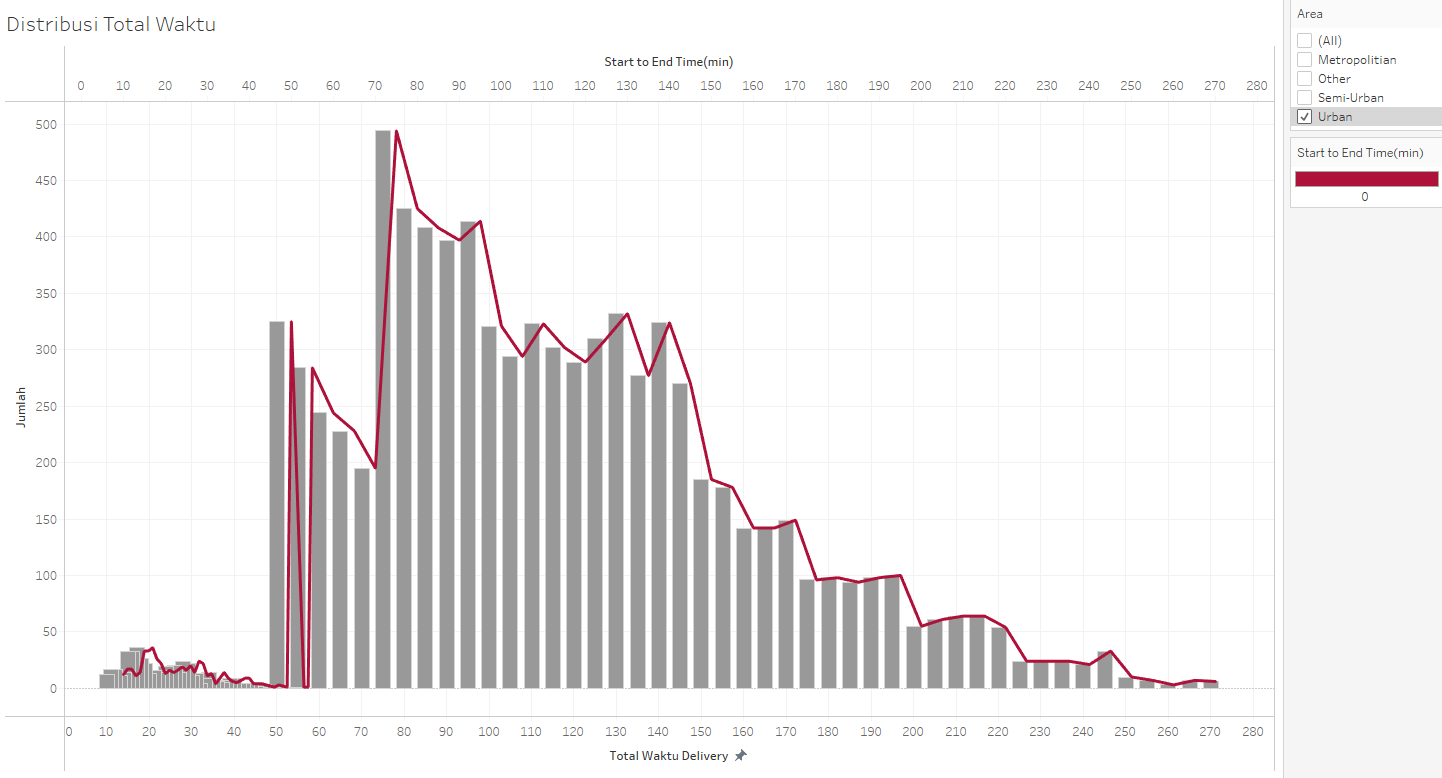

* Pada Area Urban perhitungan di Tableau berbeda sedikit dari perhitungan di python